<a href="https://colab.research.google.com/github/mthuy04/mthuy04.github.io/blob/main/iloveai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AI IS MY LIFE - HMH IS MY GUY

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import resnet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#CÀI ĐẶT CÁC THAM SỐ ---
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3
BATCH_SIZE = 32
EPOCHS_INITIAL = 20
EPOCHS_FINE_TUNE = 30
LEARNING_RATE_INITIAL = 1e-3
LEARNING_RATE_FINE_TUNE = 1e-5
NUM_AGE_CLASSES = 4
NUM_GENDER_CLASSES = 2

In [ ]:
# Đường dẫn
DRIVE_PATH = '/content/drive/MyDrive/'
CSV_FILE_PATH = os.path.join(DRIVE_PATH, 'test tiếp.csv')
IMAGE_DATA_DIR = os.path.join(DRIVE_PATH, 'Dataset_Gender_Age')

In [ ]:
AGE_CLASSES = ['Child', 'Teen', 'Adult', 'Elderly']
GENDER_CLASSES = ['Male', 'Female']

In [ ]:
# Đọc file CSV
try:
    df = pd.read_csv(CSV_FILE_PATH)
    print(f"Tải thành công file CSV. Số lượng mẫu: {len(df)}")
    print(df.head(20))
except FileNotFoundError:
    print(f"LỖI: Không tìm thấy file CSV tại: {CSV_FILE_PATH}")
    exit()

Tải thành công file CSV. Số lượng mẫu: 4200
                                                image  gender age group
0   /content/drive/MyDrive/Dataset_Gender_Age/Chil...  Female     Child
1   /content/drive/MyDrive/Dataset_Gender_Age/Chil...  Female     Child
2   /content/drive/MyDrive/Dataset_Gender_Age/Chil...  Female     Child
3   /content/drive/MyDrive/Dataset_Gender_Age/Chil...  Female     Child
4   /content/drive/MyDrive/Dataset_Gender_Age/Chil...  Female     Child
5   /content/drive/MyDrive/Dataset_Gender_Age/Chil...  Female     Child
6   /content/drive/MyDrive/Dataset_Gender_Age/Chil...  Female     Child
7   /content/drive/MyDrive/Dataset_Gender_Age/Chil...  Female     Child
8   /content/drive/MyDrive/Dataset_Gender_Age/Chil...  Female     Child
9   /content/drive/MyDrive/Dataset_Gender_Age/Chil...  Female     Child
10  /content/drive/MyDrive/Dataset_Gender_Age/Chil...  Female     Child
11  /content/drive/MyDrive/Dataset_Gender_Age/Chil...  Female     Child
12  /content/drive/M

In [ ]:
df['image_path'] = df['image']

In [ ]:
# Hiển thị thông tin cơ bản của dataframe
print("Thông tin DataFrame:")
print(df.info())
print("\nMột vài dòng đầu của DataFrame:")
print(df.head())
print(f"\nSố lượng mẫu: {len(df)}")
print("\nPhân phối giới tính:")
print(df['gender'].value_counts())
print("\nPhân phối nhóm tuổi:")
print(df['age group'].value_counts())

# Kiểm tra xem có giá trị null không
print("\nKiểm tra giá trị null:")
print(df.isnull().sum())

Thông tin DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       4200 non-null   object
 1   gender      4200 non-null   object
 2   age group   4200 non-null   object
 3   image_path  4200 non-null   object
dtypes: object(4)
memory usage: 131.4+ KB
None

Một vài dòng đầu của DataFrame:
                                               image  gender age group  \
0  /content/drive/MyDrive/Dataset_Gender_Age/Chil...  Female     Child   
1  /content/drive/MyDrive/Dataset_Gender_Age/Chil...  Female     Child   
2  /content/drive/MyDrive/Dataset_Gender_Age/Chil...  Female     Child   
3  /content/drive/MyDrive/Dataset_Gender_Age/Chil...  Female     Child   
4  /content/drive/MyDrive/Dataset_Gender_Age/Chil...  Female     Child   

                                          image_path  
0  /content/drive/MyDrive/Dataset_Gender_Age/Chil... 

In [ ]:
import os
import pandas as pd

# Đường dẫn tới file CSV chứa thông tin dữ liệu
CSV_FILE_PATH = '/content/drive/MyDrive/test tiếp.csv'

# Đọc dữ liệu từ file CSV
df = pd.read_csv(CSV_FILE_PATH)

# Giả sử cột chứa đường dẫn ảnh có tên là 'image'
image_paths = df['image'].tolist()

# Danh sách để lưu các đường dẫn không hợp lệ
invalid_paths = []

# Kiểm tra từng đường dẫn
for path in image_paths:
    if not os.path.exists(path):
        invalid_paths.append(path)

# Hiển thị kết quả
if invalid_paths:
    print("Các đường dẫn ảnh không hợp lệ:")
    for path in invalid_paths:
        print(path)
else:
    print("Tất cả các đường dẫn ảnh đều hợp lệ.")

Tất cả các đường dẫn ảnh đều hợp lệ.


In [ ]:
# %% [code]
# --- TẢI DỮ LIỆU TỪ CSV ---
# Đảm bảo đường dẫn này chính xác đến file thuy2.csv của bạn
try:
    df = pd.read_csv('/content/drive/MyDrive/test tiếp.csv') # Ví dụ đường dẫn
    print("Tải CSV thành công!")
    print(df.head())
    print(f"Số lượng mẫu ban đầu: {len(df)}")
except FileNotFoundError:
    print("LỖI: Không tìm thấy file thuy2.csv. Vui lòng kiểm tra lại đường dẫn.")
    df = pd.DataFrame()

if not df.empty:
    required_columns = ['image', 'gender', 'age group']
    if not all(col in df.columns for col in required_columns):
        print(f"LỖI: CSV phải chứa các cột: {required_columns}")
    else:
        image_paths = df['image'].values
        gender_labels_str = df['gender'].values
        age_labels_str = df['age group'].values

        print(f"Số lượng đường dẫn ảnh: {len(image_paths)}")
        print(f"Nhãn giới tính mẫu: {gender_labels_str[:5]}")
        print(f"Nhãn tuổi mẫu: {age_labels_str[:5]}")

Tải CSV thành công!
                                               image  gender age group
0  /content/drive/MyDrive/Dataset_Gender_Age/Chil...  Female     Child
1  /content/drive/MyDrive/Dataset_Gender_Age/Chil...  Female     Child
2  /content/drive/MyDrive/Dataset_Gender_Age/Chil...  Female     Child
3  /content/drive/MyDrive/Dataset_Gender_Age/Chil...  Female     Child
4  /content/drive/MyDrive/Dataset_Gender_Age/Chil...  Female     Child
Số lượng mẫu ban đầu: 4200
Số lượng đường dẫn ảnh: 4200
Nhãn giới tính mẫu: ['Female' 'Female' 'Female' 'Female' 'Female']
Nhãn tuổi mẫu: ['Child' 'Child' 'Child' 'Child' 'Child']


In [ ]:
if not df.empty and all(col in df.columns for col in required_columns):
    le1 = LabelEncoder() # Dành cho giới tính
    gender_labels_encoded = le1.fit_transform(gender_labels_str)
    # gender_labels_one_hot là Y cho nhánh giới tính của mô hình
    gender_labels_one_hot = to_categorical(gender_labels_encoded, num_classes=len(le1.classes_))
    print("Các lớp giới tính (sau khi mã hóa bởi le1):", le1.classes_) # Ví dụ: ['Female' 'Male']
    print("Kích thước gender_labels_one_hot:", gender_labels_one_hot.shape)

    le2 = LabelEncoder() # Dành cho nhóm tuổi
    age_labels_encoded = le2.fit_transform(age_labels_str)
    # age_labels_one_hot là Y cho nhánh tuổi của mô hình
    age_labels_one_hot = to_categorical(age_labels_encoded, num_classes=len(le2.classes_))
    print("Các lớp tuổi (sau khi mã hóa bởi le2):", le2.classes_) # Ví dụ: ['Adult' 'Child' 'Elderly' 'Teenager']
    print("Kích thước age_labels_one_hot:", age_labels_one_hot.shape)
else:
    print("Bỏ qua mã hóa nhãn do lỗi tải dữ liệu CSV.")


Các lớp giới tính (sau khi mã hóa bởi le1): ['Female' 'Male']
Kích thước gender_labels_one_hot: (4200, 2)
Các lớp tuổi (sau khi mã hóa bởi le2): ['Adult' 'Child' 'Elderly' 'Teen']
Kích thước age_labels_one_hot: (4200, 4)


In [ ]:
# --- HÀM TIỀN XỬ LÝ ẢNH CHÍNH (DÙNG CHO HUẤN LUYỆN VÀ KIỂM ĐỊNH) ---
# Hàm này sẽ được gọi cho mỗi ảnh trong tập dữ liệu.
def preprocess_image_for_training(image_path):
    try:
        image = load_img(image_path, target_size=(224, 224))
        image_array = img_to_array(image)

        return resnet50.preprocess_input(image_array.copy()) # Dùng .copy() để an toàn
    except Exception as e:
        print(f"Lỗi khi xử lý ảnh {image_path} cho huấn luyện: {e}")
        return None

if not df.empty and all(col in df.columns for col in required_columns):
    # Xử lý tất cả ảnh
    # LƯU Ý: Quá trình này có thể tốn thời gian nếu tập dữ liệu lớn
    print("Bắt đầu tiền xử lý ảnh cho toàn bộ dữ liệu...")
    X_processed = []
    valid_gender_labels = []
    valid_age_labels = []

    for i, path in enumerate(image_paths):
        processed_img = preprocess_image_for_training(path)
        if processed_img is not None:
            X_processed.append(processed_img)
            valid_gender_labels.append(gender_labels_one_hot[i]) # Lấy nhãn one-hot tương ứng
            valid_age_labels.append(age_labels_one_hot[i])     # Lấy nhãn one-hot tương ứng

    if X_processed: # Chỉ tiếp tục nếu có ảnh được xử lý thành công
        X_processed = np.array(X_processed)
        Y_gender_final = np.array(valid_gender_labels)
        Y_age_final = np.array(valid_age_labels)
        print("Hoàn tất tiền xử lý ảnh.")
        print("Kích thước X_processed (dữ liệu ảnh đã xử lý):", X_processed.shape)
        print("Kích thước Y_gender_final (nhãn giới tính one-hot):", Y_gender_final.shape)
        print("Kích thước Y_age_final (nhãn tuổi one-hot):", Y_age_final.shape)

        # Chia dữ liệu thành tập huấn luyện và tập kiểm tra/kiểm định
        # Sử dụng Y_age_final để stratify vì nó có nhiều lớp hơn, hoặc bạn có thể tạo một nhãn kết hợp
        X_train, X_test, \
        Y_gender_train, Y_gender_test, \
        Y_age_train, Y_age_test = train_test_split(
            X_processed,
            Y_gender_final,
            Y_age_final,
            test_size=0.2, # 20% cho tập test/validation
            random_state=42,
            stratify=Y_age_final # Giúp phân bổ các lớp tuổi đồng đều hơn
        )
        print("Đã chia dữ liệu train/test.")
        print("Kích thước X_train:", X_train.shape)
        print("Kích thước X_test:", X_test.shape)
        print("Kích thước Y_gender_train:", Y_gender_train.shape)
        print("Kích thước Y_age_train:", Y_age_train.shape)
    else:
        print("LỖI: Không có ảnh nào được xử lý thành công. Kiểm tra lại đường dẫn và file ảnh.")
else:
    print("Bỏ qua chuẩn bị dữ liệu huấn luyện do lỗi tải dữ liệu CSV.")

Bắt đầu tiền xử lý ảnh cho toàn bộ dữ liệu...
Hoàn tất tiền xử lý ảnh.
Kích thước X_processed (dữ liệu ảnh đã xử lý): (4200, 224, 224, 3)
Kích thước Y_gender_final (nhãn giới tính one-hot): (4200, 2)
Kích thước Y_age_final (nhãn tuổi one-hot): (4200, 4)
Đã chia dữ liệu train/test.
Kích thước X_train: (3360, 224, 224, 3)
Kích thước X_test: (840, 224, 224, 3)
Kích thước Y_gender_train: (3360, 2)
Kích thước Y_age_train: (3360, 4)


In [ ]:
# --- XÂY DỰNG MÔ HÌNH ---
if 'X_train' in locals() and X_train.shape[0] > 0 and 'NUM_GENDER_CLASSES' in locals() and 'NUM_AGE_CLASSES' in locals():
    input_tensor = Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS))
    base_model = resnet50.ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor)

    # Đóng băng các lớp của base model cho huấn luyện ban đầu
    base_model.trainable = False
    print(f"Số lớp trong base_model: {len(base_model.layers)}")
    print(f"Base model trainable: {base_model.trainable}")

    # Thêm các lớp tùy chỉnh (custom head)
    x = base_model.output
    x = GlobalAveragePooling2D(name="gap")(x)
    x = Dense(1024, activation='relu', name="fc1")(x)
    x = Dropout(0.5, name="dropout1")(x) # Tăng Dropout nếu overfitting
    x = Dense(512, activation='relu', name="fc2")(x)
    x = Dropout(0.5, name="dropout2")(x) # Tăng Dropout nếu overfitting

    # Nhánh đầu ra cho giới tính
    gender_output = Dense(units=NUM_GENDER_CLASSES, activation='softmax', name='gender_output')(x)

    # Nhánh đầu ra cho nhóm tuổi
    age_output = Dense(units=NUM_AGE_CLASSES, activation='softmax', name='age_output')(x)

    model = Model(inputs=base_model.input, outputs=[gender_output, age_output], name="Gender_Age_Classifier")
    print("\nĐã xây dựng mô hình.")
    model.summary()
else:
    print("Không thể xây dựng mô hình do thiếu dữ liệu huấn luyện hoặc thông tin số lớp.")


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Số lớp trong base_model: 175
Base model trainable: False

Đã xây dựng mô hình.


Model: "Gender_Age_Classifier"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 26,213,766 (100.00 MB)

 Trainable params: 2,626,054 (10.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# --- BIÊN DỊCH MÔ HÌNH ---
if 'model' in locals():
    model.compile(
        optimizer=Adam(learning_rate=LEARNING_RATE_INITIAL),
        loss={
            'gender_output': 'categorical_crossentropy',
            'age_output': 'categorical_crossentropy'
        },
        loss_weights={
            'gender_output': 0.5,
            'age_output': 0.5
        },
        metrics={
            'gender_output': 'accuracy',
            'age_output': 'accuracy'
        }
    )
    print("Đã biên dịch mô hình cho huấn luyện ban đầu.")

Đã biên dịch mô hình cho huấn luyện ban đầu.


In [ ]:
# --- CALLBACKS CHO HUẤN LUYỆN ---
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

if 'model' in locals():
    # ModelCheckpoint: Lưu lại model tốt nhất
    checkpoint_filepath = '/content/drive/MyDrive/resnet50_gender_age_fine_tune_best.keras'


    model_checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=False, # Lưu cả kiến trúc và trọng số
        monitor='val_loss', # Theo dõi val_loss tổng
        mode='min',
        save_best_only=True,
        verbose=1
    )

    # EarlyStopping: Dừng sớm nếu không có cải thiện
    early_stopping_callback = EarlyStopping(
        monitor='val_loss',
        patience=10, # Số epochs chờ trước khi dừng nếu không cải thiện
        verbose=1,
        restore_best_weights=True # Khôi phục trọng số từ epoch tốt nhất
    )

    # ReduceLROnPlateau: Giảm learning rate khi không cải thiện
    reduce_lr_callback = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2, # lr mới = lr cũ * factor
        patience=5,
        min_lr=1e-6, # Learning rate tối thiểu
        verbose=1
    )

    callbacks_list_initial = [model_checkpoint_callback, early_stopping_callback, reduce_lr_callback]
else:
    callbacks_list_initial = []



Bắt đầu huấn luyện ban đầu (Transfer Learning - Head) trong 20 epochs...
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)


105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - age_output_accuracy: 0.4328 - age_output_loss: 1.6046 - gender_output_accuracy: 0.6357 - gender_output_loss: 0.8468 - loss: 1.2257

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)



Epoch 1: val_loss improved from inf to 0.59128, saving model to /content/drive/MyDrive/resnet50_gender_age_fine_tune_best.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 843s 8s/step - age_output_accuracy: 0.4338 - age_output_loss: 1.6011 - gender_output_accuracy: 0.6363 - gender_output_loss: 0.8450 - loss: 1.2230 - val_age_output_accuracy: 0.6917 - val_age_output_loss: 0.8108 - val_gender_output_accuracy: 0.8155 - val_gender_output_loss: 0.3811 - val_loss: 0.5913 - learning_rate: 0.0010
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - age_output_accuracy: 0.6774 - age_output_loss: 0.8126 - gender_output_accuracy: 0.7873 - gender_output_loss: 0.4531 - loss: 0.6329
Epoch 2: val_loss improved from 0.59128 to 0.53054, saving model to /content/drive/MyDrive/resnet50_gender_age_fine_tune_best.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 858s 8s/step - age_output_accuracy: 0.6775 - age_output_loss: 0.8124 - gender_output_accuracy: 0.7873 - gender_output_loss: 0.4531 - loss: 0.6328 - val_age_output_accuracy: 0

<ipython-input-24-ee131c239cc1>:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


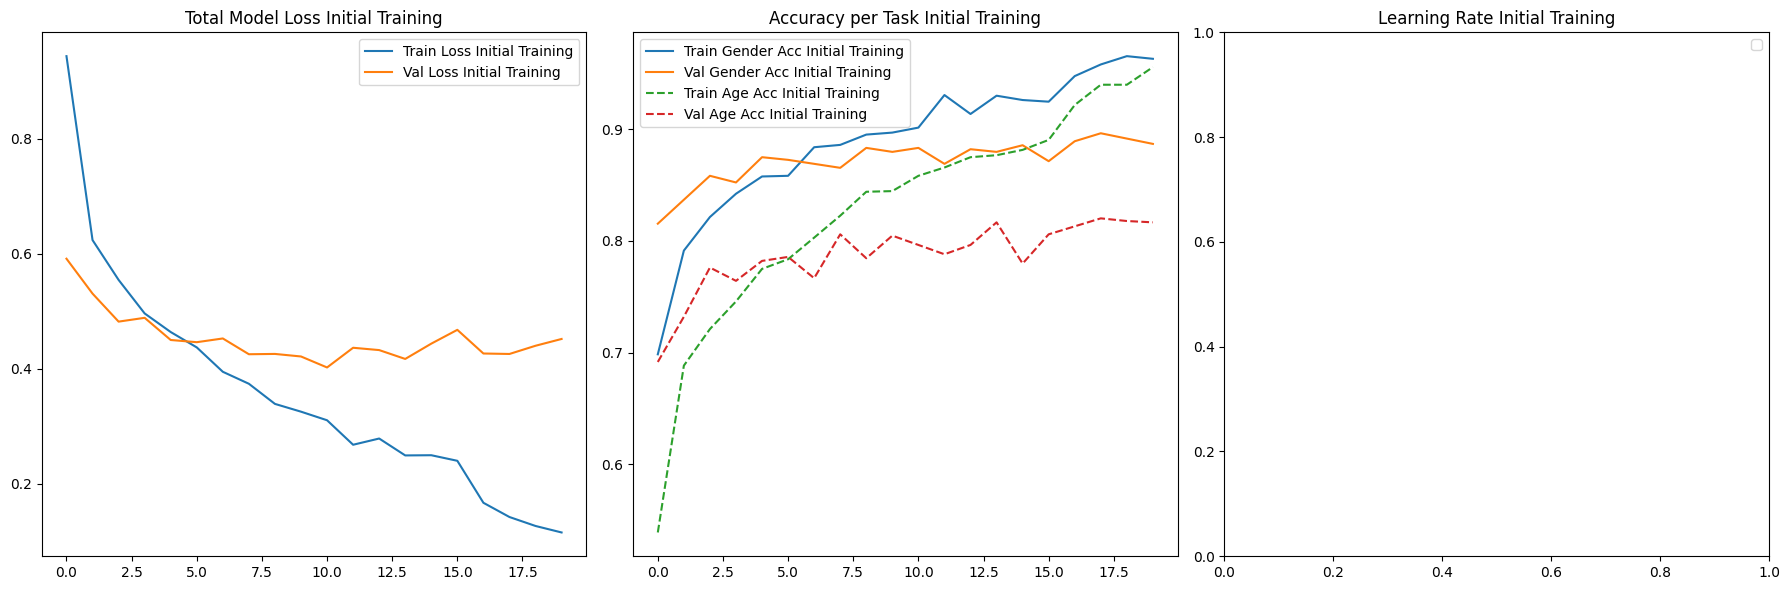

In [ ]:
# --- HUẤN LUYỆN BAN ĐẦU (CHỈ HUẤN LUYỆN HEAD) ---
import time
if 'model' in locals() and 'X_train' in locals() and X_train.shape[0] > 0:
    print(f"\nBắt đầu huấn luyện ban đầu (Transfer Learning - Head) trong {EPOCHS_INITIAL} epochs...")
    start_time = time.time()

    history_initial = model.fit(
        X_train,
        {'gender_output': Y_gender_train, 'age_output': Y_age_train},
        validation_data=(X_test, {'gender_output': Y_gender_test, 'age_output': Y_age_test}),
        epochs=EPOCHS_INITIAL,
        batch_size=BATCH_SIZE,
        callbacks=callbacks_list_initial,
        verbose=1
    )
    print(f"Hoàn tất huấn luyện ban đầu sau {time.time() - start_time:.2f}s.")

    # Vẽ đồ thị loss và accuracy
    def plot_training_history(history, stage_name=""):
        plt.figure(figsize=(18, 6))

        # Loss (Tổng, Gender, Age)
        plt.subplot(1, 3, 1)
        if 'loss' in history.history: plt.plot(history.history['loss'], label=f'Train Loss {stage_name}')
        if 'val_loss' in history.history: plt.plot(history.history['val_loss'], label=f'Val Loss {stage_name}')
        plt.legend()
        plt.title(f'Total Model Loss {stage_name}')

        plt.subplot(1, 3, 2)
        if 'gender_output_accuracy' in history.history: plt.plot(history.history['gender_output_accuracy'], label=f'Train Gender Acc {stage_name}')
        if 'val_gender_output_accuracy' in history.history: plt.plot(history.history['val_gender_output_accuracy'], label=f'Val Gender Acc {stage_name}')
        if 'age_output_accuracy' in history.history: plt.plot(history.history['age_output_accuracy'], label=f'Train Age Acc {stage_name}', linestyle='--')
        if 'val_age_output_accuracy' in history.history: plt.plot(history.history['val_age_output_accuracy'], label=f'Val Age Acc {stage_name}', linestyle='--')
        plt.legend()
        plt.title(f'Accuracy per Task {stage_name}')

        plt.subplot(1, 3, 3)
        if 'lr' in history.history: plt.plot(history.history['lr'], label=f'Learning Rate {stage_name}')
        plt.legend()
        plt.title(f'Learning Rate {stage_name}')

        plt.tight_layout()
        plt.show()

    if 'history_initial' in locals():
        plot_training_history(history_initial, "Initial Training")
else:
    print("Không thể huấn luyện do thiếu mô hình hoặc dữ liệu huấn luyện.")


In [ ]:
# ## (Tùy chọn) Giai đoạn 2: Fine-tuning
# Mở băng một vài lớp cuối của base model và huấn luyện tiếp với learning rate rất nhỏ.

# %% [code]
# --- FINE-TUNING (TÙY CHỌN) ---
# EPOCHS_FINE_TUNE = 20 # Ví dụ
# LEARNING_RATE_FINE_TUNE = 1e-5

# if 'model' in locals() and 'history_initial' in locals(): # Chỉ fine-tune nếu huấn luyện ban đầu đã chạy
#     # Mở băng một số lớp cuối của base_model
#     # Ví dụ: mở băng từ block conv5_block1_out trở đi (thường là khoảng 20-30 lớp cuối)
#     fine_tune_at = 140 # Con số này phụ thuộc vào kiến trúc ResNet50, cần kiểm tra tên lớp
#                         # Hoặc đơn giản là mở băng toàn bộ base_model và dựa vào LR rất nhỏ

#     base_model.trainable = True # Mở băng toàn bộ base
#     # Đóng băng lại các lớp từ đầu đến lớp thứ fine_tune_at (KHÔNG BAO GỒM lớp fine_tune_at)
#     # for layer in base_model.layers[:fine_tune_at]:
#     #    layer.trainable = False
#     # Hoặc cách đơn giản hơn, chỉ mở 1 vài block cuối bằng cách set trainable = True cho chúng.
#     # Đối với ResNet50, các block cuối thường là 'conv5_block3_...'
#     # Một cách khác là để base_model.trainable = True và dựa vào learning rate rất nhỏ.

#     print(f"\nBase model trainable cho fine-tuning: {base_model.trainable}")
#     # Đếm lại số lớp có thể huấn luyện
#     # trainable_layers = sum([1 if layer.trainable else 0 for layer in model.layers])
#     # print(f"Số lớp có thể huấn luyện trong toàn bộ model sau khi mở băng: {trainable_layers}")


#     model.compile(
#         optimizer=Adam(learning_rate=LEARNING_RATE_FINE_TUNE), # Learning rate RẤT NHỎ
#         loss={
#             'gender_output': 'categorical_crossentropy',
#             'age_output': 'categorical_crossentropy'
#         },
#         loss_weights={'gender_output': 0.5, 'age_output': 0.5},
#         metrics={
#             'gender_output': 'accuracy',
#             'age_output': 'accuracy'
#         }
#     )
#     print("\nĐã biên dịch lại mô hình cho fine-tuning.")
#     model.summary() # Xem lại trạng thái trainable của các lớp

#     print(f"\nBắt đầu fine-tuning trong {EPOCHS_FINE_TUNE} epochs...")
#     start_time = time.time()

#     # Sử dụng lại callbacks, có thể điều chỉnh patience cho EarlyStopping
#     callbacks_list_fine_tune = [
#         ModelCheckpoint(filepath=checkpoint_filepath.replace(".keras", "_fine_tuned.keras"), save_weights_only=False, monitor='val_loss', mode='min', save_best_only=True, verbose=1),
#         EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True), # Patience có thể khác
#         ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7, verbose=1) # min_lr có thể nhỏ hơn
#     ]

#     history_fine_tune = model.fit(
#         X_train,
#         {'gender_output': Y_gender_train, 'age_output': Y_age_train},
#         validation_data=(X_test, {'gender_output': Y_gender_test, 'age_output': Y_age_test}),
#         epochs=EPOCHS_INITIAL + EPOCHS_FINE_TUNE, # Tổng số epochs
#         initial_epoch=history_initial.epoch[-1] + 1, # Bắt đầu từ epoch cuối của giai đoạn trước
#         batch_size=BATCH_SIZE,
#         callbacks=callbacks_list_fine_tune,
#         verbose=1
#     )
#     print(f"Hoàn tất fine-tuning sau {time.time() - start_time:.2f}s.")
#     if 'history_fine_tune' in locals():
#         plot_training_history(history_fine_tune, "Fine-Tuning")
# else:
#     print("Bỏ qua fine-tuning.")


Đang tải mô hình tốt nhất từ: /content/drive/MyDrive/resnet50_gender_age_fine_tune_best.keras
Tải mô hình tốt nhất thành công.

Đánh giá mô hình tốt nhất trên tập test...
Kết quả đánh giá của mô hình TỐT NHẤT (Loss tổng, Gender Loss, Age Loss, Gender Acc, Age Acc):
  loss: 0.4359
  compile_metrics: 0.2850
  gender_output_loss: 0.5876
  age_output_loss: 0.7857
27/27 ━━━━━━━━━━━━━━━━━━━━ 162s 6s/step

--- Classification Report cho Giới tính (Mô hình tốt nhất) ---
              precision    recall  f1-score   support

      Female     0.8675    0.8867    0.8770       406
        Male     0.8918    0.8733    0.8824       434

    accuracy                         0.8798       840
   macro avg     0.8796    0.8800    0.8797       840
weighted avg     0.8800    0.8798    0.8798       840


--- Confusion Matrix cho Giới tính (Mô hình tốt nhất) ---


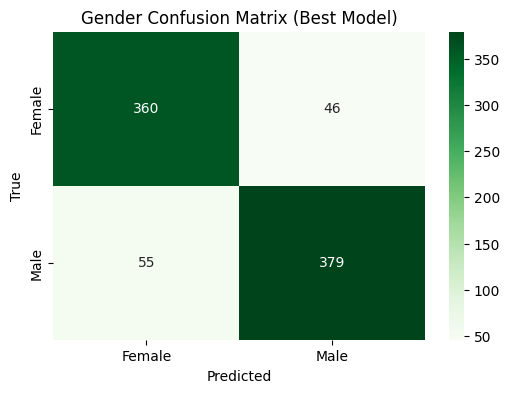


--- Classification Report cho Nhóm tuổi (Mô hình tốt nhất) ---
              precision    recall  f1-score   support

       Adult     0.6892    0.7150    0.7018       214
       Child     0.8868    0.8545    0.8704       220
     Elderly     0.7766    0.7574    0.7669       202
        Teen     0.7943    0.8137    0.8039       204

    accuracy                         0.7857       840
   macro avg     0.7867    0.7852    0.7857       840
weighted avg     0.7875    0.7857    0.7864       840


--- Confusion Matrix cho Nhóm tuổi (Mô hình tốt nhất) ---


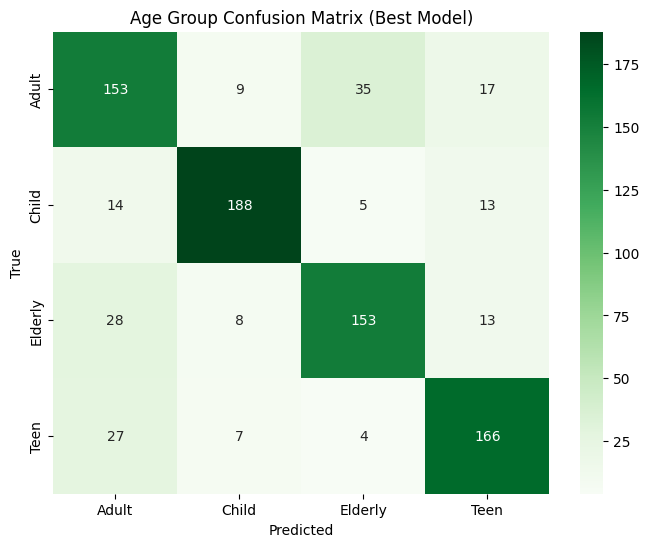

In [ ]:
# --- ĐÁNH GIÁ MÔ HÌNH CUỐI CÙNG TRÊN TẬP TEST ---
# Tải lại model tốt nhất đã lưu nếu cần (ví dụ, nếu EarlyStopping đã khôi phục hoặc bạn muốn chắc chắn)
print(f"\nĐang tải mô hình tốt nhất từ: {checkpoint_filepath}")
try:
    best_model = tf.keras.models.load_model(checkpoint_filepath) # Sửa: dùng .keras
    print("Tải mô hình tốt nhất thành công.")

    if 'X_test' in locals() and X_test.shape[0] > 0:
        print("\nĐánh giá mô hình tốt nhất trên tập test...")
        evaluation_results_best = best_model.evaluate(
            X_test,
            {'gender_output': Y_gender_test, 'age_output': Y_age_test},
            verbose=0
        )
        print("Kết quả đánh giá của mô hình TỐT NHẤT (Loss tổng, Gender Loss, Age Loss, Gender Acc, Age Acc):")
        for metric_name, value in zip(best_model.metrics_names, evaluation_results_best):
            print(f"  {metric_name}: {value:.4f}")

        Y_pred_test_best = best_model.predict(X_test)
        Y_pred_gender_indices_best = np.argmax(Y_pred_test_best[0], axis=1)
        Y_pred_age_indices_best = np.argmax(Y_pred_test_best[1], axis=1)

        Y_true_gender_indices = np.argmax(Y_gender_test, axis=1) # Đã có từ trước
        Y_true_age_indices = np.argmax(Y_age_test, axis=1)     # Đã có từ trước

        print("\n--- Classification Report cho Giới tính (Mô hình tốt nhất) ---")
        print(classification_report(Y_true_gender_indices, Y_pred_gender_indices_best, target_names=le1.classes_, digits=4))

        print("\n--- Confusion Matrix cho Giới tính (Mô hình tốt nhất) ---")
        cm_gender_best = confusion_matrix(Y_true_gender_indices, Y_pred_gender_indices_best)
        plt.figure(figsize=(6,4))
        sns.heatmap(cm_gender_best, annot=True, fmt='d', cmap='Greens', xticklabels=le1.classes_, yticklabels=le1.classes_)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Gender Confusion Matrix (Best Model)')
        plt.show()

        print("\n--- Classification Report cho Nhóm tuổi (Mô hình tốt nhất) ---")
        print(classification_report(Y_true_age_indices, Y_pred_age_indices_best, target_names=le2.classes_, digits=4))

        print("\n--- Confusion Matrix cho Nhóm tuổi (Mô hình tốt nhất) ---")
        cm_age_best = confusion_matrix(Y_true_age_indices, Y_pred_age_indices_best)
        plt.figure(figsize=(8,6))
        sns.heatmap(cm_age_best, annot=True, fmt='d', cmap='Greens', xticklabels=le2.classes_, yticklabels=le2.classes_)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Age Group Confusion Matrix (Best Model)')
        plt.show()
    else:
        print("Không thể đánh giá do thiếu dữ liệu test.")
except Exception as e:
    print(f"Lỗi khi tải hoặc đánh giá mô hình tốt nhất: {e}. Sử dụng mô hình hiện tại trong bộ nhớ (nếu có).")
    # Có thể thêm phần đánh giá cho 'model' hiện tại ở đây nếu 'best_model' không tải được


In [ ]:
# --- HÀM DỰ ĐOÁN TRÊN ẢNH ĐƠN LẺ (ĐÃ SỬA) ---
def predict_single_image_final(image_path, model_to_predict, gender_encoder, age_encoder):
    try:
        # 1. Tải và tiền xử lý ảnh ĐÚNG CÁCH
        img_pil = load_img(image_path, target_size=IMAGE_SIZE)
        img_array = img_to_array(img_pil)
        processed_img_array = resnet50.preprocess_input(img_array.copy())
        final_image_batch = np.expand_dims(processed_img_array, axis=0)

        # 2. Thực hiện dự đoán
        predictions = model_to_predict.predict(final_image_batch)

        # 3. Lấy nhãn dự đoán
        gender_idx = np.argmax(predictions[0][0])
        age_idx = np.argmax(predictions[1][0])

        predicted_gender_label = gender_encoder.inverse_transform([gender_idx])[0]
        predicted_age_label = age_encoder.inverse_transform([age_idx])[0]

        # Hiển thị ảnh và kết quả
        plt.figure(figsize=(6,6)) # Kích thước ảnh hiển thị
        plt.imshow(img_pil)
        plt.title(f'Predicted Gender: {predicted_gender_label}\nPredicted Age: {predicted_age_label}', fontsize=14)
        plt.axis('off')
        plt.show()

        return predicted_gender_label, predicted_age_label
    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy file ảnh tại '{image_path}'")
        return None, None
    except Exception as e:
        print(f"Lỗi khi xử lý hoặc dự đoán ảnh {image_path}: {e}")
        return None, None


----------------------------------------------------------------
>>> VUI LÒNG TẢI LÊN MỘT HOẶC NHIỀU ẢNH ĐỂ DỰ ĐOÁN <<<
----------------------------------------------------------------


Saving BABY 5.jpg to BABY 5.jpg

--- Đang dự đoán cho ảnh: BABY 5.jpg ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


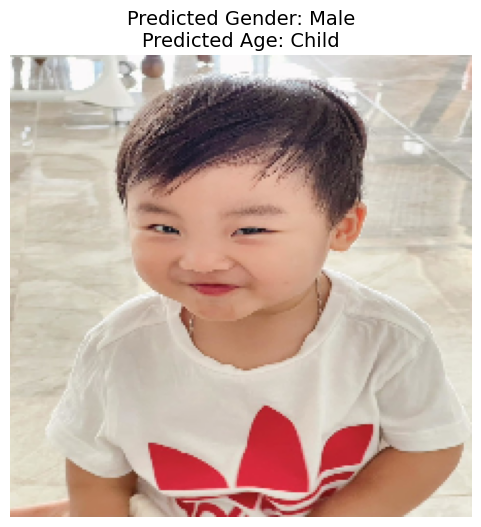

  Kết quả dự đoán:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
    Giới tính: Male (Xác suất: 0.65)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
    Nhóm tuổi: Child (Xác suất: 0.96)


In [ ]:
# --- SỬ DỤNG HÀM DỰ ĐOÁN ĐÃ SỬA ---
if 'best_model' in locals() and 'le1' in locals() and 'le2' in locals():
    model_for_prediction = best_model # Sử dụng model tốt nhất đã tải
elif 'model' in locals() and 'le1' in locals() and 'le2' in locals():
    print("Cảnh báo: Không tải được best_model, sử dụng model cuối cùng trong bộ nhớ để dự đoán.")
    model_for_prediction = model
else:
    model_for_prediction = None

if model_for_prediction:
    from google.colab import files
    print("\n----------------------------------------------------------------")
    print(">>> VUI LÒNG TẢI LÊN MỘT HOẶC NHIỀU ẢNH ĐỂ DỰ ĐOÁN <<<")
    print("----------------------------------------------------------------")
    uploaded = files.upload()

    if not uploaded:
        print("Không có file nào được tải lên.")
    else:
        for fn in uploaded.keys():
            path = fn
            print(f"\n--- Đang dự đoán cho ảnh: {path} ---")

            g_label, a_label = predict_single_image_final(path, model_for_prediction, le1, le2)

            if g_label and a_label:
                print(f"  Kết quả dự đoán:")
                print(f"    Giới tính: {g_label} (Xác suất: {np.max(model_for_prediction.predict(np.expand_dims(resnet50.preprocess_input(img_to_array(load_img(path, target_size=IMAGE_SIZE)).copy()), axis=0))[0][0]):.2f})")
                print(f"    Nhóm tuổi: {a_label} (Xác suất: {np.max(model_for_prediction.predict(np.expand_dims(resnet50.preprocess_input(img_to_array(load_img(path, target_size=IMAGE_SIZE)).copy()), axis=0))[1][0]):.2f})")
            else:
                print(f"  Không thể đưa ra dự đoán cho ảnh {path}.")
else:
    print("Không thể chạy dự đoán do thiếu mô hình (model/best_model) hoặc LabelEncoders (le1, le2).")
    print("Vui lòng đảm bảo các cell ở trên đã chạy thành công và mô hình đã được huấn luyện/tải.")


Sử dụng 'best_model' để dự đoán.

--- Đang dự đoán cho ảnh: /content/drive/MyDrive/Dataset_Gender_Age/Adult/Female/000034.jpg ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


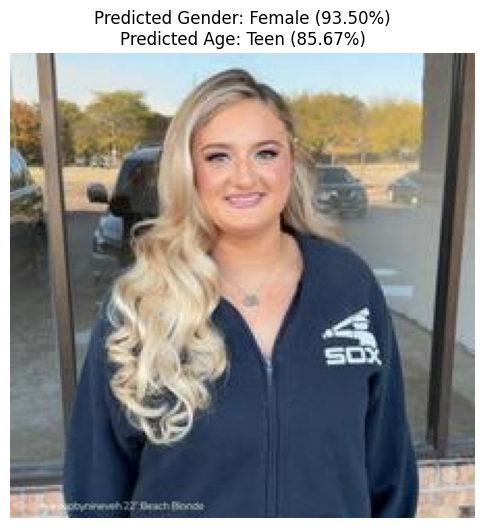

  Kết quả dự đoán:
    Giới tính: Female (Độ tin cậy: 93.50%)
    Nhóm tuổi: Teen (Độ tin cậy: 85.67%)
  Thời gian dự đoán: 0.7334 giây

--- Đang dự đoán cho ảnh: /content/drive/MyDrive/Dataset_Gender_Age/Elderly/Male/000237.jpg ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


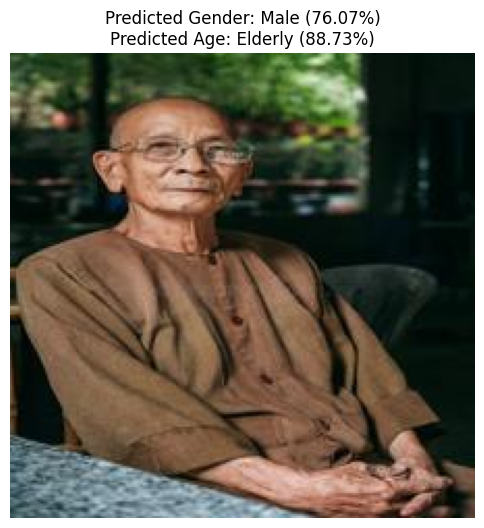

  Kết quả dự đoán:
    Giới tính: Male (Độ tin cậy: 76.07%)
    Nhóm tuổi: Elderly (Độ tin cậy: 88.73%)
  Thời gian dự đoán: 0.7268 giây


In [ ]:
# %% [markdown]
# ## Dự đoán trên một ảnh cụ thể từ Google Drive

# %% [code]
# --- DỰ ĐOÁN TRÊN ẢNH ĐƠN LẺ TỪ GOOGLE DRIVE ---

# Đảm bảo các biến này đã được định nghĩa và mô hình đã được tải/huấn luyện từ các cell trước:
# model_to_use: Mô hình đã huấn luyện (ví dụ: best_model hoặc model)
# le1: LabelEncoder cho giới tính (đã fit)
# le2: LabelEncoder cho tuổi (đã fit)
# IMAGE_SIZE: Kích thước ảnh đầu vào (ví dụ: (224, 224))
# resnet50: Module resnet50 từ tensorflow.keras.applications

# Kiểm tra sự tồn tại của các biến cần thiết
if 'best_model' in locals():
    model_to_use = best_model
    print("Sử dụng 'best_model' để dự đoán.")
elif 'model' in locals():
    model_to_use = model
    print("Cảnh báo: 'best_model' không tìm thấy, sử dụng 'model' cuối cùng trong bộ nhớ để dự đoán.")
else:
    print("LỖI: Không tìm thấy biến 'model' hoặc 'best_model'. Vui lòng huấn luyện hoặc tải mô hình trước.")
    model_to_use = None

if 'le1' not in locals() or 'le2' not in locals():
    print("LỖI: Không tìm thấy biến 'le1' hoặc 'le2' (LabelEncoders). Vui lòng chạy lại các cell mã hóa nhãn.")
    le1 = None # Đặt là None để tránh lỗi nếu không tìm thấy
    le2 = None

if model_to_use and le1 and le2:


    # Danh sách các đường dẫn ảnh bạn muốn thử
    image_paths_to_predict = [
        '/content/drive/MyDrive/Dataset_Gender_Age/Adult/Female/000034.jpg',
        '/content/drive/MyDrive/Dataset_Gender_Age/Elderly/Male/000237.jpg',
        # Thêm các đường dẫn khác nếu muốn
    ]

    # Lặp qua từng đường dẫn và dự đoán
    for single_image_path in image_paths_to_predict:
        print(f"\n--- Đang dự đoán cho ảnh: {single_image_path} ---")
        try:
            # 1. Tải và tiền xử lý ảnh (NHẤT QUÁN với hàm predict_single_image_final)
            img_pil = load_img(single_image_path, target_size=IMAGE_SIZE)
            img_array = img_to_array(img_pil)
            processed_img_array = resnet50.preprocess_input(img_array.copy()) # Sử dụng .copy() để an toàn
            final_image_batch = np.expand_dims(processed_img_array, axis=0)

            # 2. Thực hiện dự đoán
            start_pred_time = time.time()
            predictions = model_to_use.predict(final_image_batch)
            end_pred_time = time.time()

            # predictions[0] là dự đoán cho gender_output
            # predictions[1] là dự đoán cho age_output

            # 3. Lấy nhãn dự đoán
            gender_idx = np.argmax(predictions[0][0])
            age_idx = np.argmax(predictions[1][0])

            predicted_gender_label = le1.inverse_transform([gender_idx])[0]
            predicted_age_label = le2.inverse_transform([age_idx])[0]

            gender_confidence = np.max(predictions[0][0]) * 100
            age_confidence = np.max(predictions[1][0]) * 100

            # Hiển thị ảnh và kết quả
            plt.figure(figsize=(6,7)) # Điều chỉnh kích thước nếu cần
            plt.imshow(img_pil) # Hiển thị ảnh gốc trước khi qua resnet50.preprocess_input
            title_text = (f'Predicted Gender: {predicted_gender_label} ({gender_confidence:.2f}%)\n'
                          f'Predicted Age: {predicted_age_label} ({age_confidence:.2f}%)')
            plt.title(title_text, fontsize=12)
            plt.axis('off') # Ẩn các trục tọa độ
            plt.show()

            print(f"  Kết quả dự đoán:")
            print(f"    Giới tính: {predicted_gender_label} (Độ tin cậy: {gender_confidence:.2f}%)")
            print(f"    Nhóm tuổi: {predicted_age_label} (Độ tin cậy: {age_confidence:.2f}%)")
            print(f"  Thời gian dự đoán: {end_pred_time - start_pred_time:.4f} giây")

        except FileNotFoundError:
            print(f"  LỖI: Không tìm thấy file ảnh tại '{single_image_path}'. Vui lòng kiểm tra lại đường dẫn.")
        except Exception as e:
            print(f"  LỖI: Đã xảy ra lỗi khi xử lý hoặc dự đoán ảnh {single_image_path}: {e}")
            # In thêm traceback để debug nếu cần thiết
            # import traceback
            # traceback.print_exc()
else:
    print("\nKhông thể thực hiện dự đoán do thiếu mô hình hoặc LabelEncoders.")
    print("Vui lòng chạy các cell huấn luyện và chuẩn bị dữ liệu ở trên trước.")